# **Build classification model using Mini Batch gradient and Stochastic Gradient techniques**

In Machine Learning, <br>
* ***Gradient Descent*** is an **optimization technique used for computing the model parameters** (coefficients and bias) for algorithms like linear regression, logistic regression, neural networks, etc. 
* In this technique, we **repeatedly iterate** through the training set and **update the model parameters** in accordance with the gradient of error with respect to the training set.
<br>
<br>
* ***Depending on the number of training examples considered in updating the model parameters, we have 3-types of gradient descents:***

1. **Batch Gradient Descent:** Parameters are updated after computing the gradient of error with respect to the entire training set
2. **Stochastic Gradient Descent:** Parameters are updated after computing the gradient of error with respect to a single training example
3. **Mini-Batch Gradient Descent:** Parameters are updated after computing the gradient of error with respect to a subset of the training set

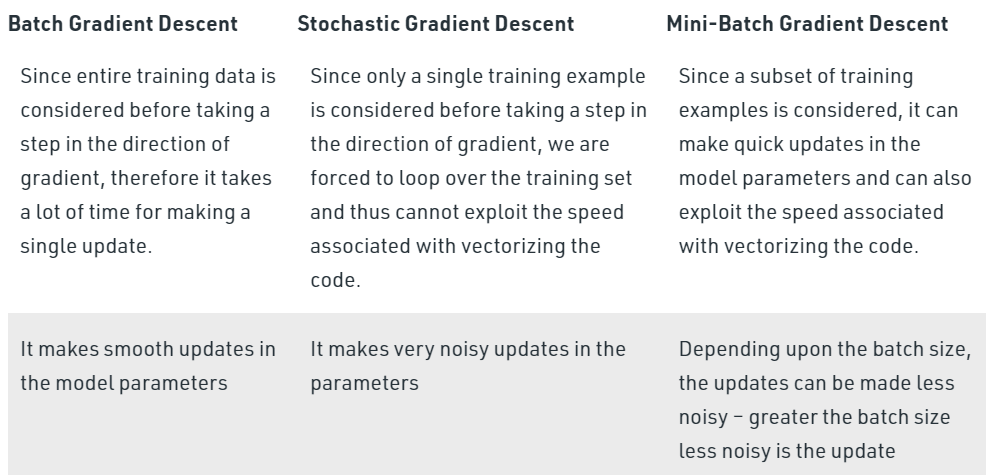

## **Mini-Batch Gradient Descent with Python**

### **Mini-Batch Gradient Descent Algorithm-** 

*Let theta = model parameters and max_iters = number of epochs.*

> for itr = 1, 2, 3, …, max_iters:<br>
> > for mini_batch (X_mini, y_mini):
>> * Forward Pass on the batch X_mini:
>>  * Make predictions on the mini-batch
>>  * Compute error in predictions (J(theta)) with the current values of the parameters
>> * Backward Pass:
>>  * Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
>> * Update parameters:
>>  *theta = theta – learning_rate*gradient(theta)

<u>**Step #1:**</u> 
* First step is to import dependencies, 
* generate data for linear regression and visualize the generated data. 

*We have generated 8000 data examples, each having 2 attributes/features. These data examples are further divided into training set (X_train, y_train) and testing set (X_test, y_test) having 7200 and 800 examples respectively.*

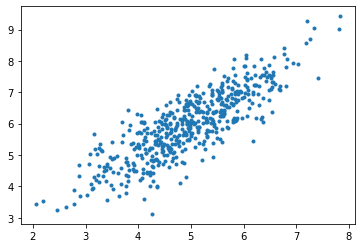

Number of examples in training set =  7200
Number of examples in testing set =  800


In [6]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt

# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.show()

# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.90
split = int(split_factor * data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))

print("Number of examples in training set = % d"%(X_train.shape[0]))
print("Number of examples in testing set = % d"%(X_test.shape[0]))


<u>**Step #2:**</u> 
* Next, we write the code for implementing linear regression using mini-batch gradient descent.
* gradientDescent() is the main driver function and other functions are helper functions used for making predictions – 
 * hypothesis(), 
 * computing gradients – gradient(), 
 * computing error – cost() 
 * and creating mini-batches – create_mini_batches(). 
 
The driver function initializes the parameters, computes the best set of parameters for the model and returns these parameters along with a list containing history of errors as the parameters get updated.

In [7]:
# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, theta):
	return np.dot(X, theta)

# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
	h = hypothesis(X, theta)
	grad = np.dot(X.transpose(), (h - y))
	return grad

# function to compute the error for current values of theta
def cost(X, y, theta):
	h = hypothesis(X, theta)
	J = np.dot((h - y).transpose(), (h - y))
	J /= 2
	return J[0]

# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	i = 0

	for i in range(n_minibatches + 1):
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	if data.shape[0] % batch_size != 0:
		mini_batch = data[i * batch_size:data.shape[0]]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	return mini_batches

# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32):
	theta = np.zeros((X.shape[1], 1))
	error_list = []
	max_iters = 3
	for itr in range(max_iters):
		mini_batches = create_mini_batches(X, y, batch_size)
		for mini_batch in mini_batches:
			X_mini, y_mini = mini_batch
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
			error_list.append(cost(X_mini, y_mini, theta))

	return theta, error_list


### **Calling the gradientDescent() function to compute the model parameters (theta) and visualizing the change in error function.**

Bias =  [0.76583824]
Coefficients =  [[0.99385453]]


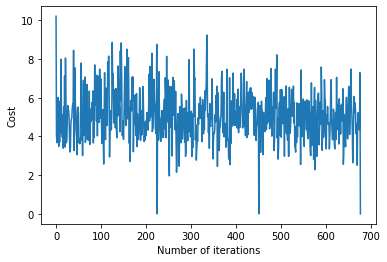

In [8]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


<u>**Step #3 :**</u> 
* Finally, we make predictions on the testing set and compute the mean absolute error in predictions.

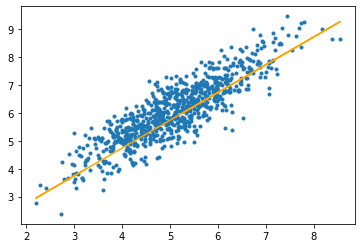

Mean absolute error =  0.4932199842855714


In [9]:
# predicting output for X_test
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)


### Mean absolute error = 0.4366644295854125

***The orange line represents the final hypothesis function:*** 
* theta[0] + ((theta[1]) x (X_test[:, 1])) + ((theta[2]) x (X_test[:, 2])) = 0 



---



# <u>**Stochastic Gradient Descent (SGD):**</u>



* The word ‘stochastic‘ means a system or a process that is linked with a random probability. 
* Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. 
*In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. 
* In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. 
* Although, using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, but the problem arises when our datasets gets big.
* Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima is reached.
* Hence, it becomes computationally very expensive to perform.
* This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

# **SGD algorithm:**

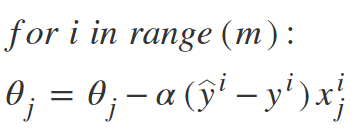

So, in SGD, we find out the gradient of the cost function of a single example at each iteration instead of the sum of the gradient of the cost function of all the examples.

In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with significantly shorter training time.

One thing to be noted is that, as SGD is generally noisier than typical Gradient Descent, it usually took a higher number of iterations to reach the minima, because of its randomness in its descent. Even though it requires a higher number of iterations to reach the minima than typical Gradient Descent, it is still computationally much less expensive than typical Gradient Descent. Hence, in most scenarios, SGD is preferred over Batch Gradient Descent for optimizing a learning algorithm.

Path taken by Batch Gradient Descent –
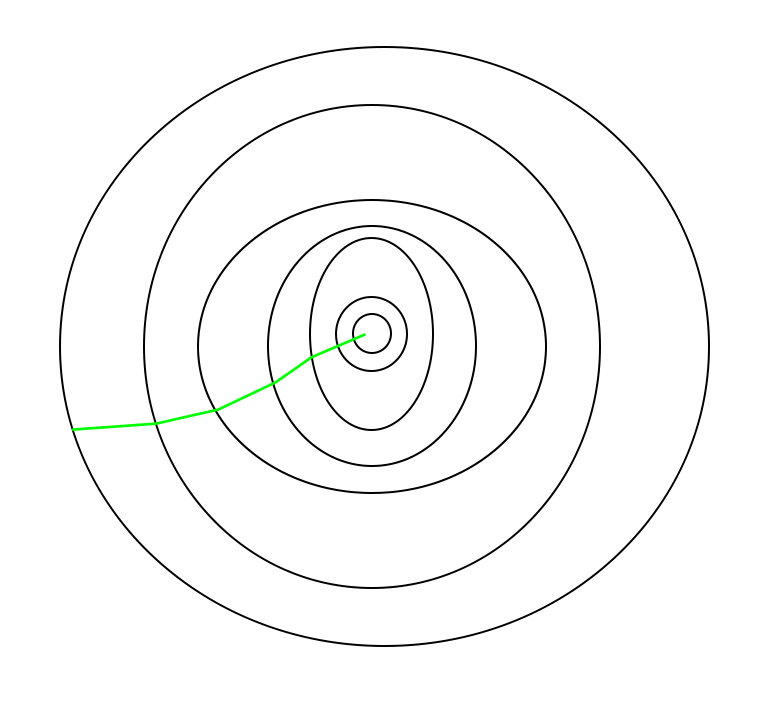

Path taken by Stochastic Gradient Descent –
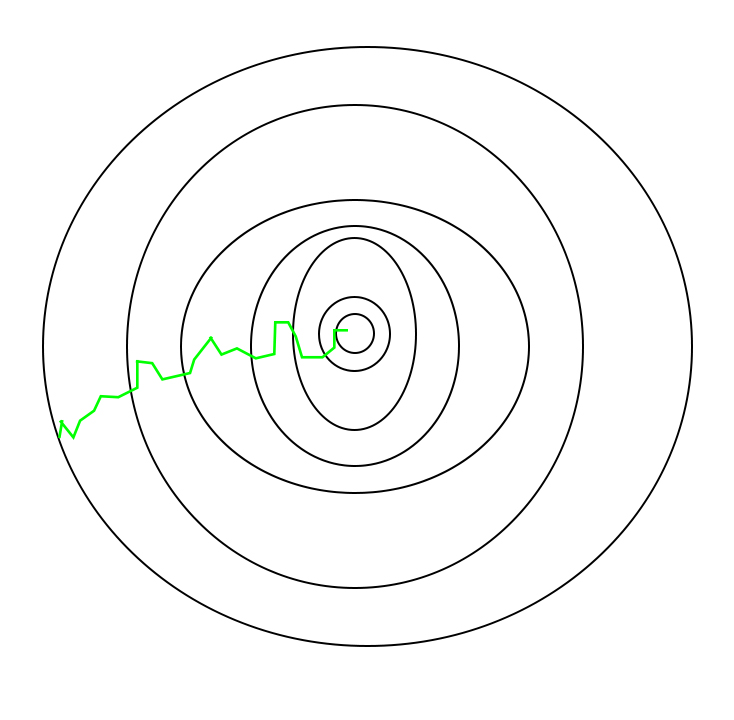

In [10]:
def SGD(f, theta0, alpha, num_iters):
	"""
	Arguments:
	f -- the function to optimize, it takes a single argument
			and yield two outputs, a cost and the gradient
			with respect to the arguments
	theta0 -- the initial point to start SGD from
	num_iters -- total iterations to run SGD for
	Return:
	theta -- the parameter value after SGD finishes
	"""
	start_iter = 0
	theta = theta0
	for iter in xrange(start_iter + 1, num_iters + 1):
		_, grad = f(theta)

		# there is NO dot product ! return theta
		theta = theta - (alpha * grad)
